In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

This project aims to analyze a dataset of 100,000 medical appointments in Brazil to understand the factors influencing patient no-show rates. The dataset contains information about various patient characteristics, including their scheduled appointment day, neighborhood, and scholarship enrollment status in the Bolsa Familia program.

It's important to note that the target variable ("No-show") is encoded inversely, with "No" indicating the patient showed up for their appointment and "Yes" indicating they did not show up.

## Data Wrangling

In [2]:
df = pd.read_csv('medical_appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.duplicated().sum()

0

In [5]:
df['PatientId'].nunique()

62299

In [6]:
df.duplicated(['PatientId','No-show']).sum()

38710

there are 38710 patients with same status of showing or not, we will remove them in data cleaning phase.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


min age = -1 this is surely a mistake so i will remove it and it wont affect anything because 75% = 55 , 50% = 37 and 25% = 18 and mean is 37 and it is only one row

majority are not handcapped

In [10]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data Cleaning

In [11]:
df.drop(index=99832,inplace = True)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
df.rename(columns = {'Hipertension':'Hypertension'},inplace = True)
df.rename(columns = {'No-show':'No_show'},inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.drop_duplicates(['PatientId','No_show'],inplace = True)
df.shape

(71816, 14)

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data wrangling summary

After reading the data from the CSV file, we examined the first few rows to identify any initial patterns or inconsistencies. 

We then checked the data dimensions to understand its overall size. 

Next, we identified and removed duplicate appointments to ensure data integrity. 

Following that, we checked for duplicate patient IDs and removed them to avoid data redundancy. 

We then explored the data types of each column and addressed any missing values using appropriate techniques like imputation or deletion. 

Finally, to enhance data clarity and analysis efficiency, we renamed columns with more descriptive names and removed unnecessary information deemed irrelevant for further analysis.

## Exploratory Data Analysis

Now that we have completed data cleaning and preprocessing, we are ready to move on to the exploratory data analysis (EDA) phase. 

In this stage, we will compute descriptive statistics and create visualizations to gain insights from the data and address the research questions outlined in the introduction.

### General look

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hypertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>]], dtype=object)

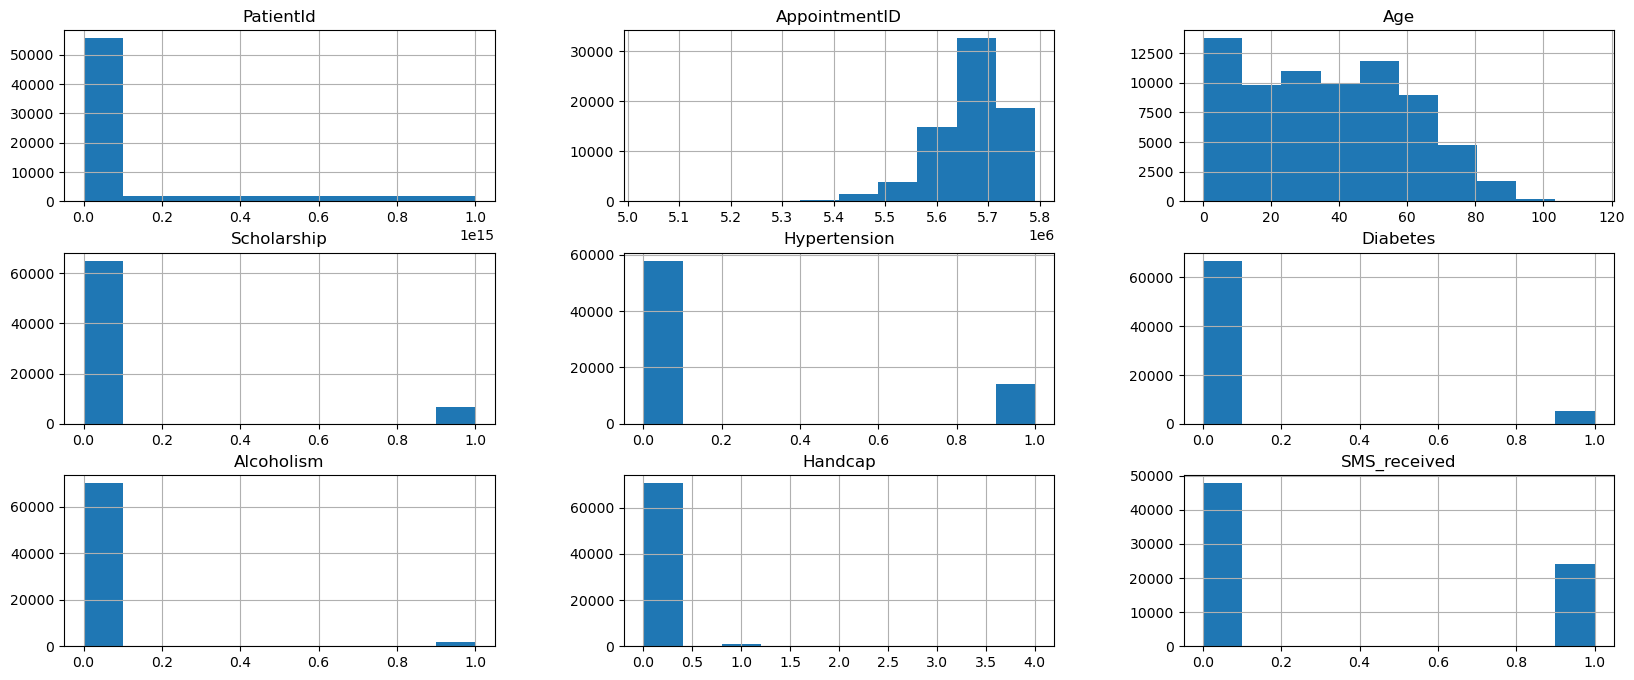

In [16]:
df.hist(figsize = (20,8))

In [17]:
df['No_show'].value_counts()

No_show
No     54153
Yes    17663
Name: count, dtype: int64

Number of showed patients is (54153) which is 3 time greater than non showed patients (17663)

### Does Age affect attendence?

In [32]:
df['Age'].nunique()

103

In [23]:
show = df[df['No_show'] == 'No']
noshow = df[df['No_show'] == 'Yes']

(0.0, 120.0)

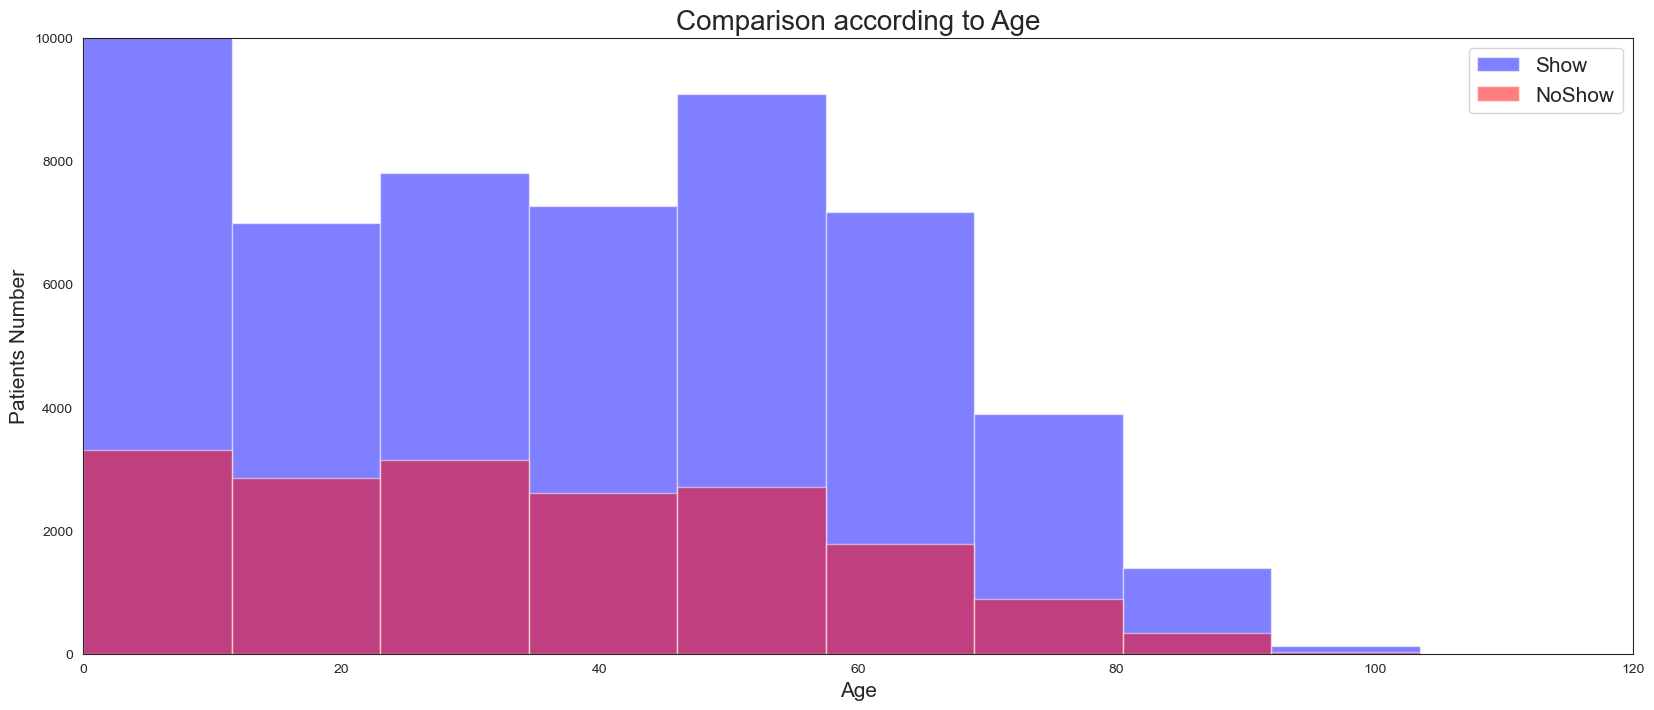

In [145]:
show = df[df['No_show'] == 'No']
noShow = df[df['No_show'] == 'Yes']

plt.figure(figsize=[20,8])

plt.hist(show['Age'], alpha=0.5, bins=10, color="blue", label="Show", edgecolor = 'white' )
plt.hist(noshow['Age'], alpha=0.5, bins=10, color='red', label="NoShow", edgecolor = 'white' )

plt.title("Comparison according to Age", fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Patients Number', fontsize = 15)
plt.margins(x=0)
plt.ylim(0,10000)
# plt.xticks(range(10))
plt.legend(fontsize = 15)
plt.xlim(0,120)

Age from 0 to 8 are the most showing ( parents take care of their children ) then from 45 to 55 then the least attending are whom above 65 years old.

In [72]:
show_data = df[df['No_show'] == 'No'].groupby(['Hypertension', 'Diabetes'])['Age'].mean()
show_data

Hypertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

In [74]:
no_show_data = df[df['No_show'] == 'Yes'].groupby(['Hypertension', 'Diabetes'])['Age'].mean()
no_show_data

Hypertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

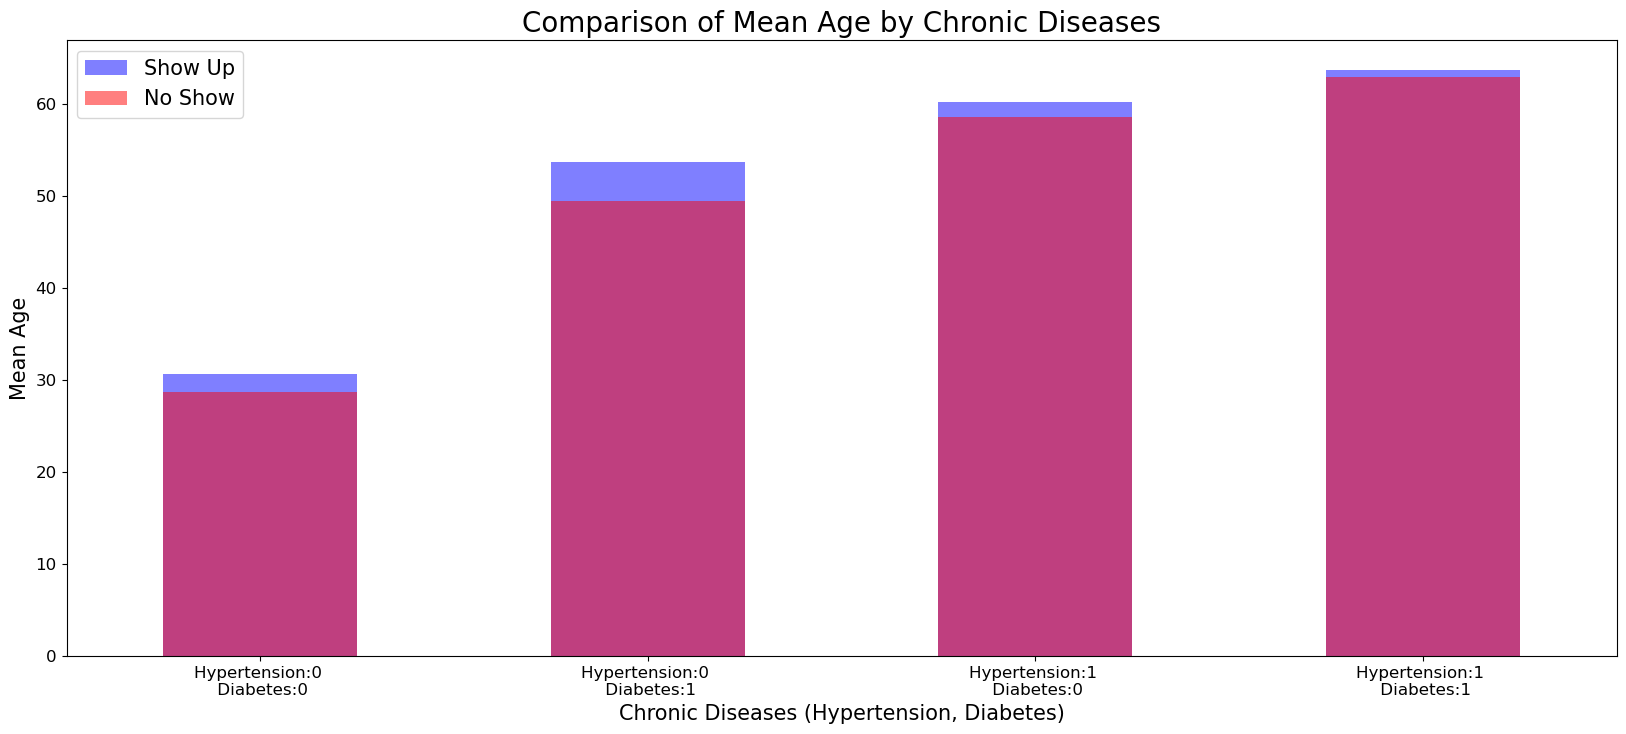

In [71]:
show_data = df[df['No_show'] == 'No'].groupby(['Hypertension', 'Diabetes'])['Age'].mean()
no_show_data = df[df['No_show'] == 'Yes'].groupby(['Hypertension', 'Diabetes'])['Age'].mean()

plt.figure(figsize=(20, 8))

show_data.plot(kind='bar', alpha=0.5, color='blue', label='Show Up')
no_show_data.plot(kind='bar', alpha=0.5, color='red', label='No Show')

plt.legend(fontsize=15)
plt.title("Comparison of Mean Age by Chronic Diseases", fontdict={'size': 20})
plt.xlabel('Chronic Diseases (Hypertension, Diabetes)', fontdict={'size': 15})
plt.ylabel('Mean Age', fontdict={'size': 15})

plt.xticks(fontsize=12,rotation = 0) 
plt.yticks(fontsize=12) 
tick_values, tick_labels = plt.xticks()
plt.xticks(tick_values, ['Hypertension:0 \n Diabetes:0','Hypertension:0 \n Diabetes:1','Hypertension:1 \n Diabetes:0','Hypertension:1 \n Diabetes:1'])

plt.show()

The analysis reveals a potential positive correlation between age and the presence of chronic diseases. This is evident from the observation that patients with any chronic disease (Hypertension or Diabetes) have a higher mean age (63 years) compared to those without chronic diseases (30 years) in the "show up" group. This pattern is also observed in the "no-show" group

However, the data does not show a clear correlation between chronic diseases and patient attendance (showing up or not showing up) for appointments. While there are slight differences in mean age between the "show up" and "no-show" groups for both chronic disease categories, these differences are relatively small.

### Does gender affect attendance?

In [82]:
show_gender = show['Gender'].value_counts().reset_index(name='Count')
show_gender

,Gender,Count
0,F,34960
1,M,19193


In [84]:
no_show_gender = noShow['Gender'].value_counts().reset_index(name='Count')
no_show_gender

,Gender,Count
0,F,11506
1,M,6157


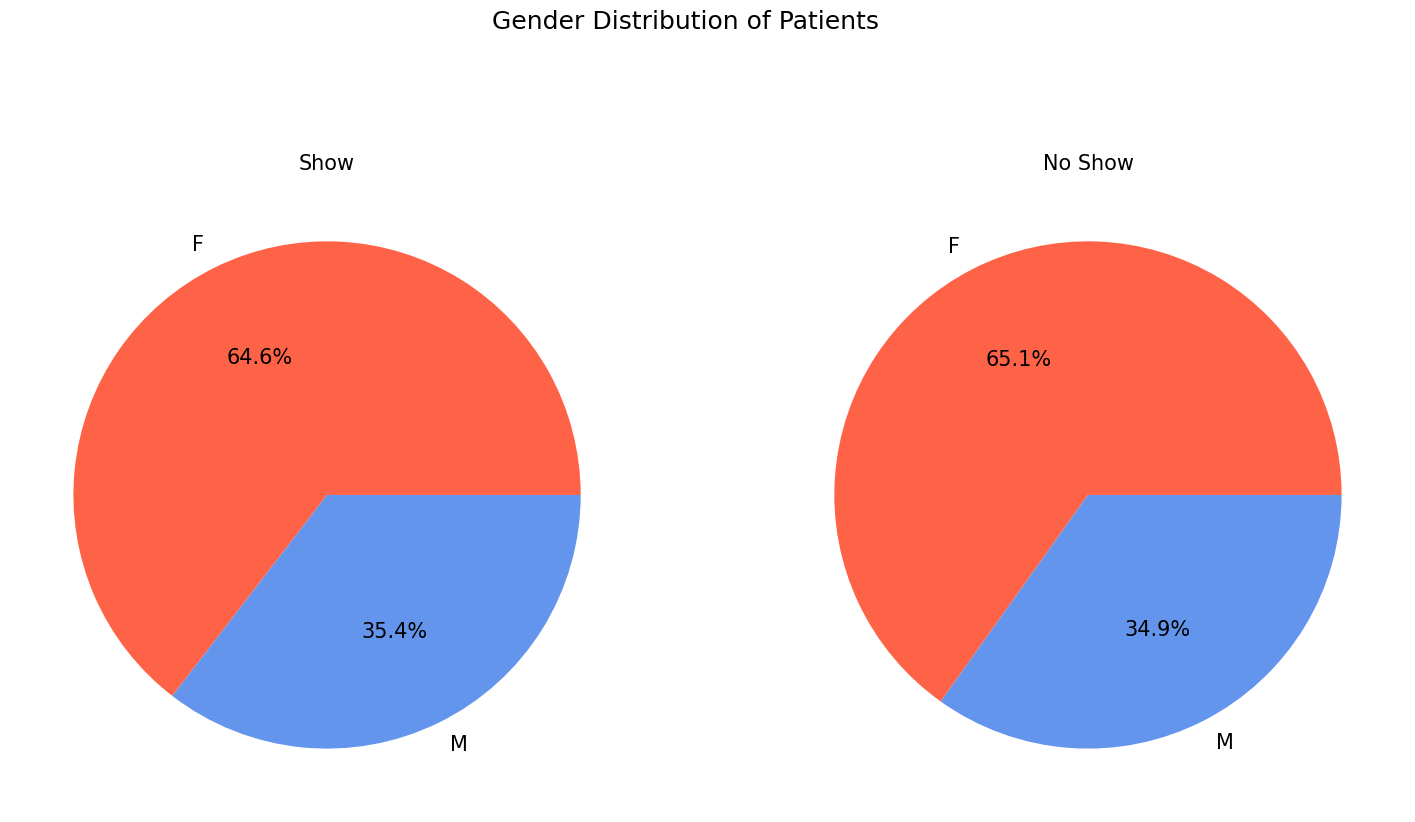

In [111]:
fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(121)
ax1.set_title('Show', fontsize=15)
ax1.pie(show_gender['Count'], labels = show_gender['Gender'], autopct = '%.1f%%',
       colors = ['tomato', 'cornflowerblue'],
        textprops = dict(color = 'black', fontsize = 15))

ax2 = fig.add_subplot(122)
ax2.set_title('No Show', fontsize=15)
ax2.pie(no_show_gender['Count'], labels = no_show_gender['Gender'], autopct = '%.1f%%',
       colors = ['tomato', 'cornflowerblue'],
        textprops = dict(color = 'black', fontsize = 15))
plt.suptitle('Gender Distribution of Patients', fontsize=18, ha='center')
plt.show()

For show and no show, females both account for a similarly higher proportion than males (64.6% for show, 65.1% for no show).

So gender has no effect on attendance.

In [114]:
show_gender_age = show.groupby('Gender')['Age'].mean()
show_gender_age

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64

In [115]:
no_show_gender_age = noShow.groupby('Gender')['Age'].mean()
no_show_gender_age

Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

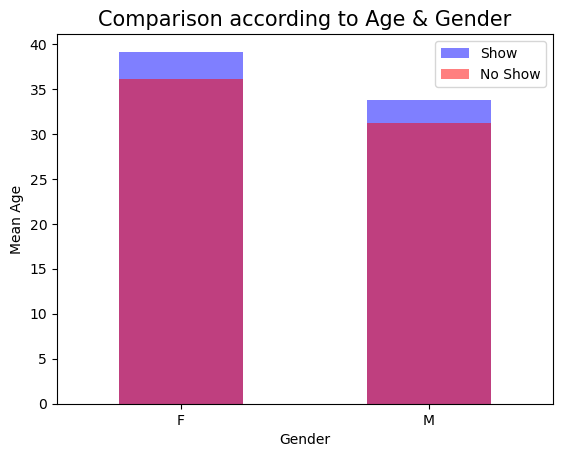

In [119]:
show_gender_age.plot(kind='bar', alpha=0.5, color='blue', label='Show')
no_show_gender_age.plot(kind='bar', alpha=0.5, color='red', label='No Show')

plt.legend(fontsize = 10)

plt.title("Comparison according to Age & Gender",fontdict={'size':'15'})
plt.xlabel('Gender',fontdict={'size':'10'})
plt.ylabel('Mean Age',fontdict={'size':'10'})
plt.xticks(rotation = 0)

There is no correlation between Gender and Age affecting the show rate.

The mean of Gender Ages showing and no showing is almost the same.

Text(0, 0.5, 'Patients Number')

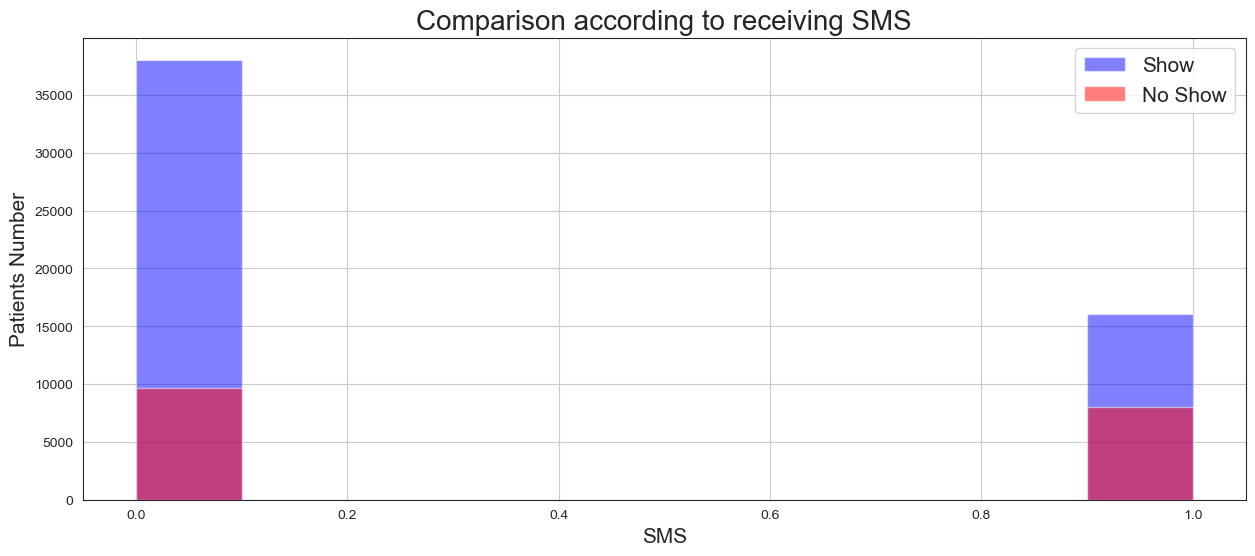

In [131]:
plt.figure(figsize=[15,6])
sns.set_style('white')

show['SMS_received'].hist(alpha=0.5, bins=10, color="blue", label="Show")
noShow['SMS_received'].hist(alpha=0.5, bins=10, color="red", label="No Show")

plt.legend(fontsize = 15)
plt.title("Comparison according to receiving SMS",fontdict={'size':'20'})
plt.xlabel('SMS',fontdict={'size':'15'})
plt.ylabel('Patients Number',fontdict={'size':'15'})

Our data shows that patients who did not receive SMS reminders are more likely to miss appointments than those who did. This suggests that our SMS campaign might not be performing as well as expected and warrants further investigation.

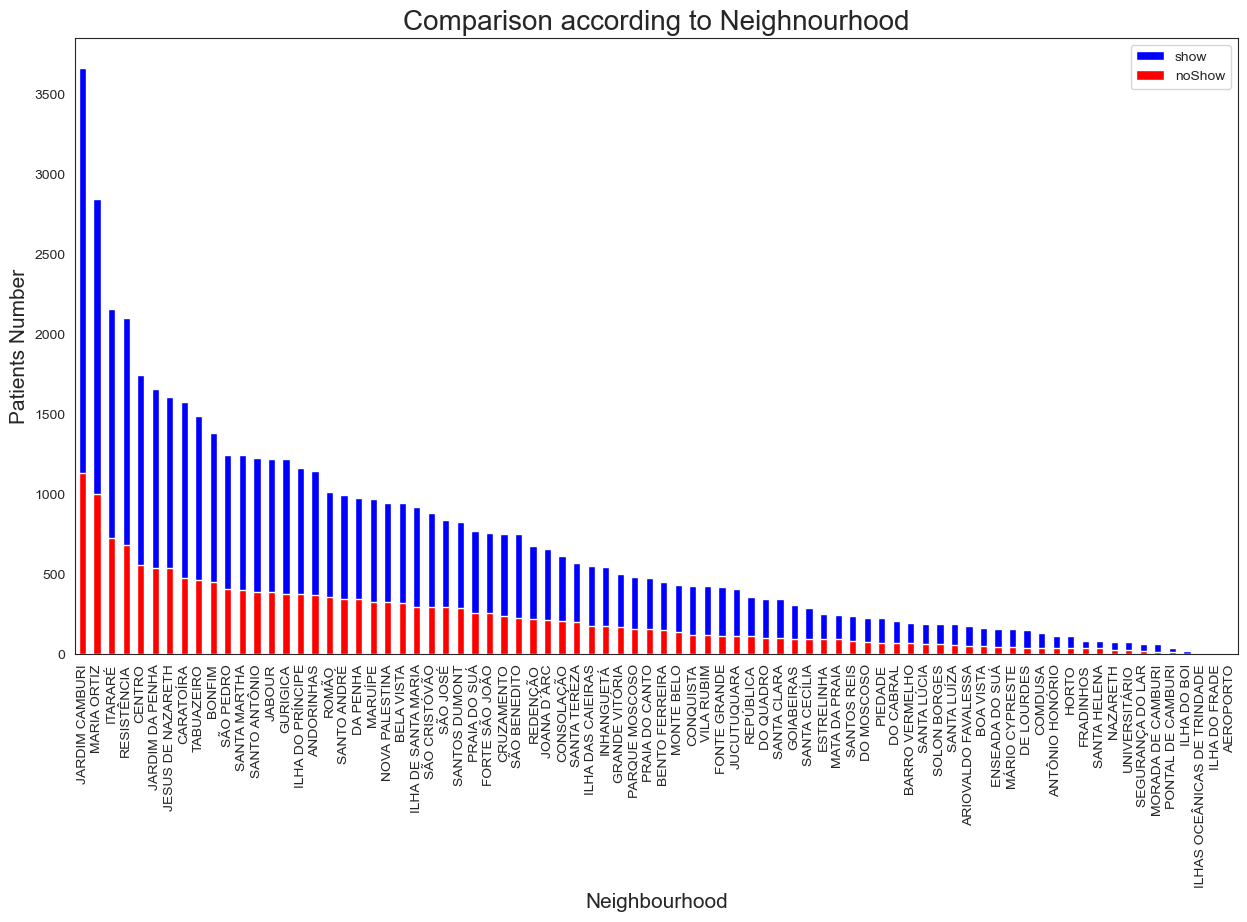

In [132]:
plt.figure(figsize=[15,8])

show['Neighbourhood'].value_counts().plot(kind = 'bar',color = 'blue',label = 'show')

noShow['Neighbourhood'].value_counts().plot(kind = 'bar',color = 'red',label = 'noShow')

plt.legend(fontsize = 10);

plt.title("Comparison according to Neighnourhood",fontdict={'size':'20'});

plt.xlabel('Neighbourhood',fontdict={'size':'15'});

plt.ylabel('Patients Number',fontdict={'size':'15'});

Neighbourhood has a great effect on attending or not. 'JARDIM CAMBURI' has the greatest number of patients as well as showing rate.

In [133]:
show_neihood_SMS = show.groupby('Neighbourhood')['SMS_received'].mean()
show_neihood_SMS

Neighbourhood
AEROPORTO              0.166667
ANDORINHAS             0.227683
ANTÔNIO HONÓRIO        0.341935
ARIOVALDO FAVALESSA    0.203947
BARRO VERMELHO         0.338624
                         ...   
SÃO JOSÉ               0.332609
SÃO PEDRO              0.263972
TABUAZEIRO             0.282005
UNIVERSITÁRIO          0.280488
VILA RUBIM             0.328421
Name: SMS_received, Length: 80, dtype: float64

In [137]:
no_show_neihood_SMS = noShow.groupby('Neighbourhood')['SMS_received'].mean()
no_show_neihood_SMS

Neighbourhood
AEROPORTO              0.000000
ANDORINHAS             0.363144
ANTÔNIO HONÓRIO        0.450000
ARIOVALDO FAVALESSA    0.307692
BARRO VERMELHO         0.382353
                         ...   
SÃO JOSÉ               0.440273
SÃO PEDRO              0.380835
TABUAZEIRO             0.455914
UNIVERSITÁRIO          0.333333
VILA RUBIM             0.529915
Name: SMS_received, Length: 80, dtype: float64

Text(0, 0.5, 'Mean SMS Received')

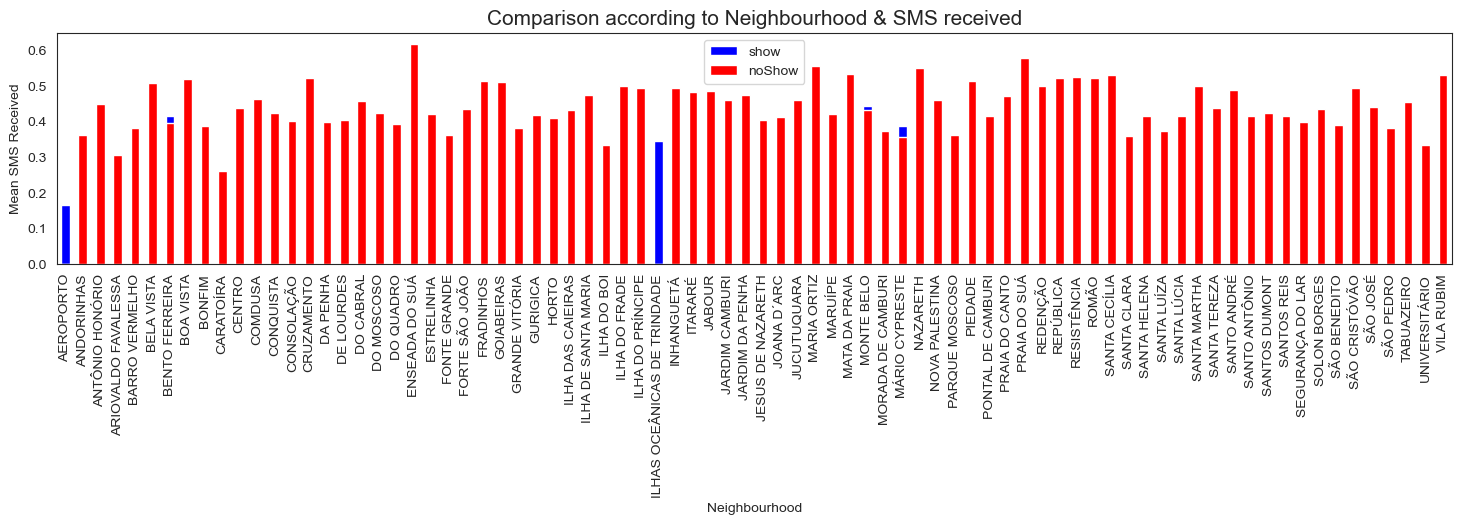

In [138]:
plt.figure(figsize=[18,3])

show_neihood_SMS.plot(kind = 'bar' , color = 'blue' , label = 'show')
no_show_neihood_SMS.plot(kind = 'bar' , color = 'red' , label = 'noShow')

plt.legend()

plt.title("Comparison according to Neighbourhood & SMS received",fontdict={'size':'15'})

plt.xlabel('Neighbourhood',fontdict={'size':'10'})

plt.ylabel('Mean SMS Received',fontdict={'size':'10'})

SMS has resonded in 5 neighbourhoods 'ILHAS OCEANICAS DE TRINDADE' is the most responsive neighbourhood to SMS

In [140]:
show_neihood_age = show.groupby('Neighbourhood')['Age'].mean()

In [139]:
no_show_neihood_age = noShow.groupby('Neighbourhood')['Age'].mean()

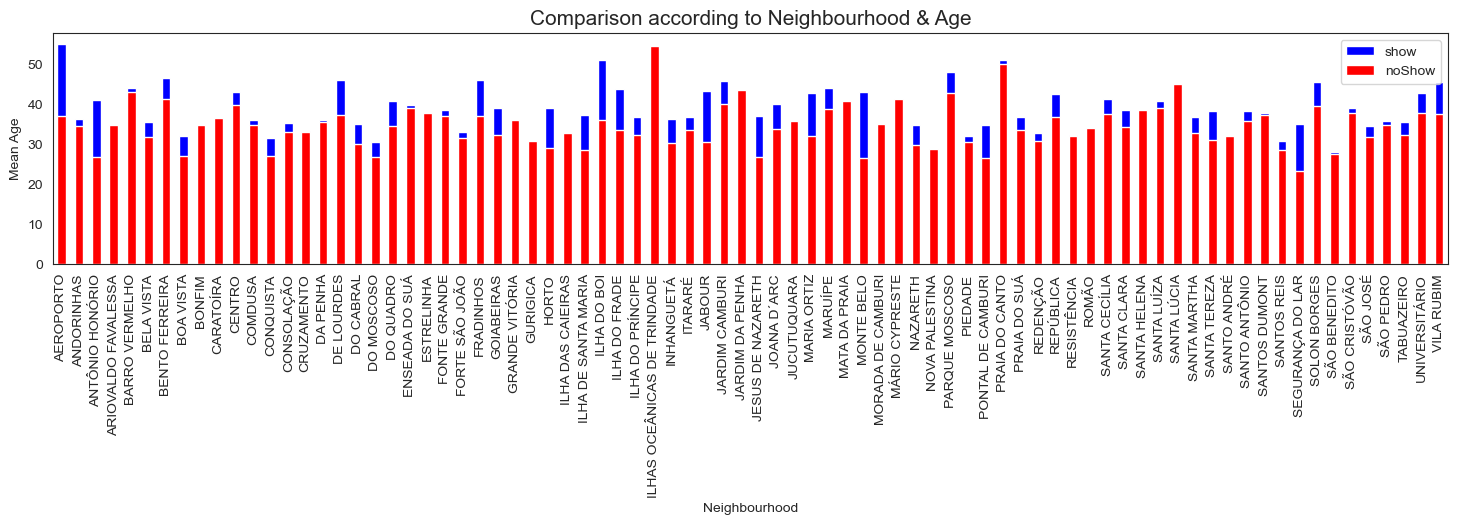

In [141]:
plt.figure(figsize=[18,3])

show_neihood_age.plot(kind = 'bar' , color = 'blue' , label = 'show')
no_show_neihood_age.plot(kind = 'bar' , color = 'red' , label = 'noShow')

plt.legend()

plt.title("Comparison according to Neighbourhood & Age",fontdict={'size':'15'})

plt.xlabel('Neighbourhood',fontdict={'size':'10'})

plt.ylabel('Mean Age',fontdict={'size':'10'})


### Conclusions¶
1. This analysis revealed significant neighborhood variability in patient attendance, with JARDIM CAMBURI having both the highest number of patients and the highest show-up rate.


2. Further analysis within neighborhoods indicated that show-up rates were influenced by both age and receipt of SMS reminders.

    Key findings regarding age included:

    a. Highest show-up rates for patients aged 0-8 (likely parents accompanying children).
    b. Moderate show-up rates for patients aged 45-55.
    c. Lowest show-up rates for patients over 65 years old.

    The results also showed that the number of patients who did not show up was higher for those who did not receive SMS reminders compared to those who did. This suggests the need to revisit the current SMS campaign strategy to determine its effectiveness and identify potential areas for improvement.